# Regression Project

In this project, your goal is to build regression models of housing prices. The models should learn from data and be able to predict the median house price in a district (which is a population of 600 to 3000 people), given some predictor variables. 


## Python setup

In [246]:
# Python setup
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

## Import data

In [247]:
# import data
URL = "https://raw.githubusercontent.com/jan-kirenz/project-Helenaschick/main/project_data.csv?token=GHSAT0AAAAAABQAIIJYYUUJFD55IYPG54ZCYPG7HTQ"
df = pd.read_csv(URL)

In [248]:
# show the first rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,-122.23,37.88,41.0years,880,129.0,322,126,8.3252,452600.0$,NEAR BAY,above
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY,above
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100.0,NEAR BAY,above
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300.0,NEAR BAY,above
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200.0,NEAR BAY,above


**Findings:** mistake in data line 0, columns hosuing_median_age and median_house_value

In [249]:
# show the last rows
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
20635,-121.09,39.48,25.0,1665,374.0,845,330,1.5603,78100.0,INLAND,above
20636,-121.21,39.49,18.0,697,150.0,356,114,2.5568,77100.0,INLAND,above
20637,-121.22,39.43,17.0,2254,485.0,1007,433,1.7000,92300.0,INLAND,above
20638,-121.32,39.43,18.0,1860,409.0,741,349,1.8672,84700.0,INLAND,above
20639,-121.24,39.37,16.0,2785,616.0,1387,530,2.3886,89400.0,INLAND,above


In [250]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  object 
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  object 
 9   ocean_proximity     20640 non-null  object 
 10  price_category      20640 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


**Findings:** Values missing in colum total_bedrooms

In [251]:
# show all variables in the data set
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'price_category'],
      dtype='object')

## Tidying data & feature engineering

In [252]:
# remove 'years' in line 0, column housing_median_age
df.housing_median_age[0] = '41.0'

C:\Users\chris\AppData\Local\Temp/ipykernel_9664/1385586849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.housing_median_age[0] = '41.0'


In [253]:
# remove '$' in line 0, column median_house_value
df.median_house_value[0] = '452600.0'

C:\Users\chris\AppData\Local\Temp/ipykernel_9664/3990115854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.median_house_value[0] = '452600.0'


In [254]:
# change data type
df['housing_median_age'] = pd.to_numeric(df['housing_median_age'])
df['median_house_value'] = pd.to_numeric(df['median_house_value'])

In [255]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_household"] = df["total_bedrooms"] / df["households"]
df["size_household"] = df["population"] / df["households"]


In [256]:
# remove column price_category (needed for classification), longitude and latitude (influence other variables), variables used for derivation of new columns
df_new = df.drop(columns=['price_category', 'longitude' , 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'])
df.drop(columns=['price_category', 'longitude' , 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'])

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,size_household
0,41.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,52.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,52.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,52.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,18.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,17.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,18.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


In [257]:
df_new.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,size_household
0,41.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,52.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,52.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,52.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [258]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   housing_median_age      20640 non-null  float64
 1   median_income           20640 non-null  float64
 2   median_house_value      20640 non-null  float64
 3   ocean_proximity         20640 non-null  object 
 4   rooms_per_household     20640 non-null  float64
 5   bedrooms_per_household  20433 non-null  float64
 6   size_household          20640 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


housing_median_age          0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_household    207
size_household              0
dtype: int64


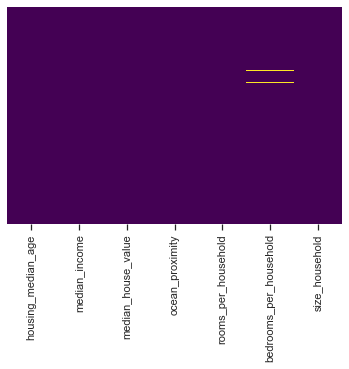

In [259]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(df_new.isnull().sum())

In [260]:
# remove rows with missing data
df_new_2 = df_new.dropna()
df_new.dropna()

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,size_household
0,41.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,52.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,52.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,52.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,18.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,17.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,18.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


In [261]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   housing_median_age      20433 non-null  float64
 1   median_income           20433 non-null  float64
 2   median_house_value      20433 non-null  float64
 3   ocean_proximity         20433 non-null  object 
 4   rooms_per_household     20433 non-null  float64
 5   bedrooms_per_household  20433 non-null  float64
 6   size_household          20433 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.2+ MB


## Data preprocessing pipeline

In [262]:
# Modules
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [263]:
# for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [264]:
# for categorical features  
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [265]:
# Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])

## Data split

In [266]:
# encode our categorical features as one-hot numeric features (dummy variables)
dummies = pd.get_dummies(df_new_2[['ocean_proximity']])

dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ocean_proximity_<1H OCEAN   20433 non-null  uint8
 1   ocean_proximity_INLAND      20433 non-null  uint8
 2   ocean_proximity_ISLAND      20433 non-null  uint8
 3   ocean_proximity_NEAR BAY    20433 non-null  uint8
 4   ocean_proximity_NEAR OCEAN  20433 non-null  uint8
dtypes: uint8(5)
memory usage: 259.4 KB


In [267]:
# labels
y = df_new_2['median_house_value']

In [268]:
# drop the column with the outcome variable and categorical columns for which we already created dummy variables
X_numerical = df_new_2.drop(['median_house_value', 'ocean_proximity'], axis=1).astype('float64')

In [269]:
# list all numerical features
list_numerical = X_numerical.columns
list_numerical

Index(['housing_median_age', 'median_income', 'rooms_per_household',
       'bedrooms_per_household', 'size_household'],
      dtype='object')

In [270]:
# create all features
X = pd.concat([X_numerical, dummies[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   housing_median_age         20433 non-null  float64
 1   median_income              20433 non-null  float64
 2   rooms_per_household        20433 non-null  float64
 3   bedrooms_per_household     20433 non-null  float64
 4   size_household             20433 non-null  float64
 5   ocean_proximity_<1H OCEAN  20433 non-null  uint8  
 6   ocean_proximity_INLAND     20433 non-null  uint8  
 7   ocean_proximity_ISLAND     20433 non-null  uint8  
 8   ocean_proximity_NEAR BAY   20433 non-null  uint8  
dtypes: float64(5), uint8(4)
memory usage: 1.0 MB


In [271]:
# data split into train and test set with the first 70% of the data for training and the remaining 30% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [272]:
X_train.head()

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,size_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
11909,32.0,2.3798,4.768067,1.036975,2.341176,0,1,0,0
11389,20.0,3.8187,5.099174,1.363636,2.181818,0,0,0,0
16935,34.0,3.4902,4.274064,1.082219,1.604278,0,0,0,0
9351,52.0,7.1155,8.822134,1.150198,2.889328,0,0,0,1
2087,52.0,1.0000,3.927083,1.010417,5.520833,0,1,0,0


In [273]:
train_dataset = X_train.sample(frac=0.8, random_state=0)
train_dataset['median_house_value'] = y_train
test_dataset = df_new_2.drop(train_dataset.index)

train_dataset

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,size_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,median_house_value
18763,18.0,2.4036,4.912969,0.986348,2.387372,0,1,0,0,105400.0
8088,34.0,2.8438,4.620968,1.069892,3.881720,0,0,0,0,139300.0
15235,36.0,10.1768,6.102837,0.936170,2.517730,0,0,0,0,500001.0
11613,21.0,4.8000,4.603774,1.056604,2.547170,1,0,0,0,196900.0
1871,24.0,2.5875,9.775785,2.318386,3.385650,0,1,0,0,173400.0
...,...,...,...,...,...,...,...,...,...,...
2300,28.0,3.5670,6.074468,1.070922,2.351064,0,1,0,0,85500.0
9763,28.0,4.2500,5.653295,0.982808,2.779370,1,0,0,0,279100.0
7514,22.0,2.0096,4.027027,1.045045,3.396396,1,0,0,0,110700.0
20165,26.0,2.6893,5.355263,1.005639,2.599624,1,0,0,0,230800.0


## Transform data 

In [274]:
# summary statistics for all numerical columns (in transposed view)
round(train_dataset.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,11442.0,28.67,12.55,1.00,18.00,29.00,37.00,52.00
median_income,11442.0,3.87,1.90,0.50,2.57,3.55,4.76,15.00
rooms_per_household,11442.0,5.43,2.48,0.89,4.45,5.23,6.06,141.91
bedrooms_per_household,11442.0,1.10,0.44,0.38,1.01,1.05,1.10,25.64
size_household,11442.0,3.02,6.09,0.75,2.43,2.82,3.27,599.71
ocean_proximity_<1H OCEAN,11442.0,0.44,0.50,0.00,0.00,0.00,1.00,1.00
ocean_proximity_INLAND,11442.0,0.32,0.47,0.00,0.00,0.00,1.00,1.00
ocean_proximity_ISLAND,11442.0,0.00,0.02,0.00,0.00,0.00,0.00,1.00
ocean_proximity_NEAR BAY,11442.0,0.11,0.31,0.00,0.00,0.00,0.00,1.00
median_house_value,11442.0,206657.30,115669.96,14999.00,118800.00,179700.00,264475.00,500001.00


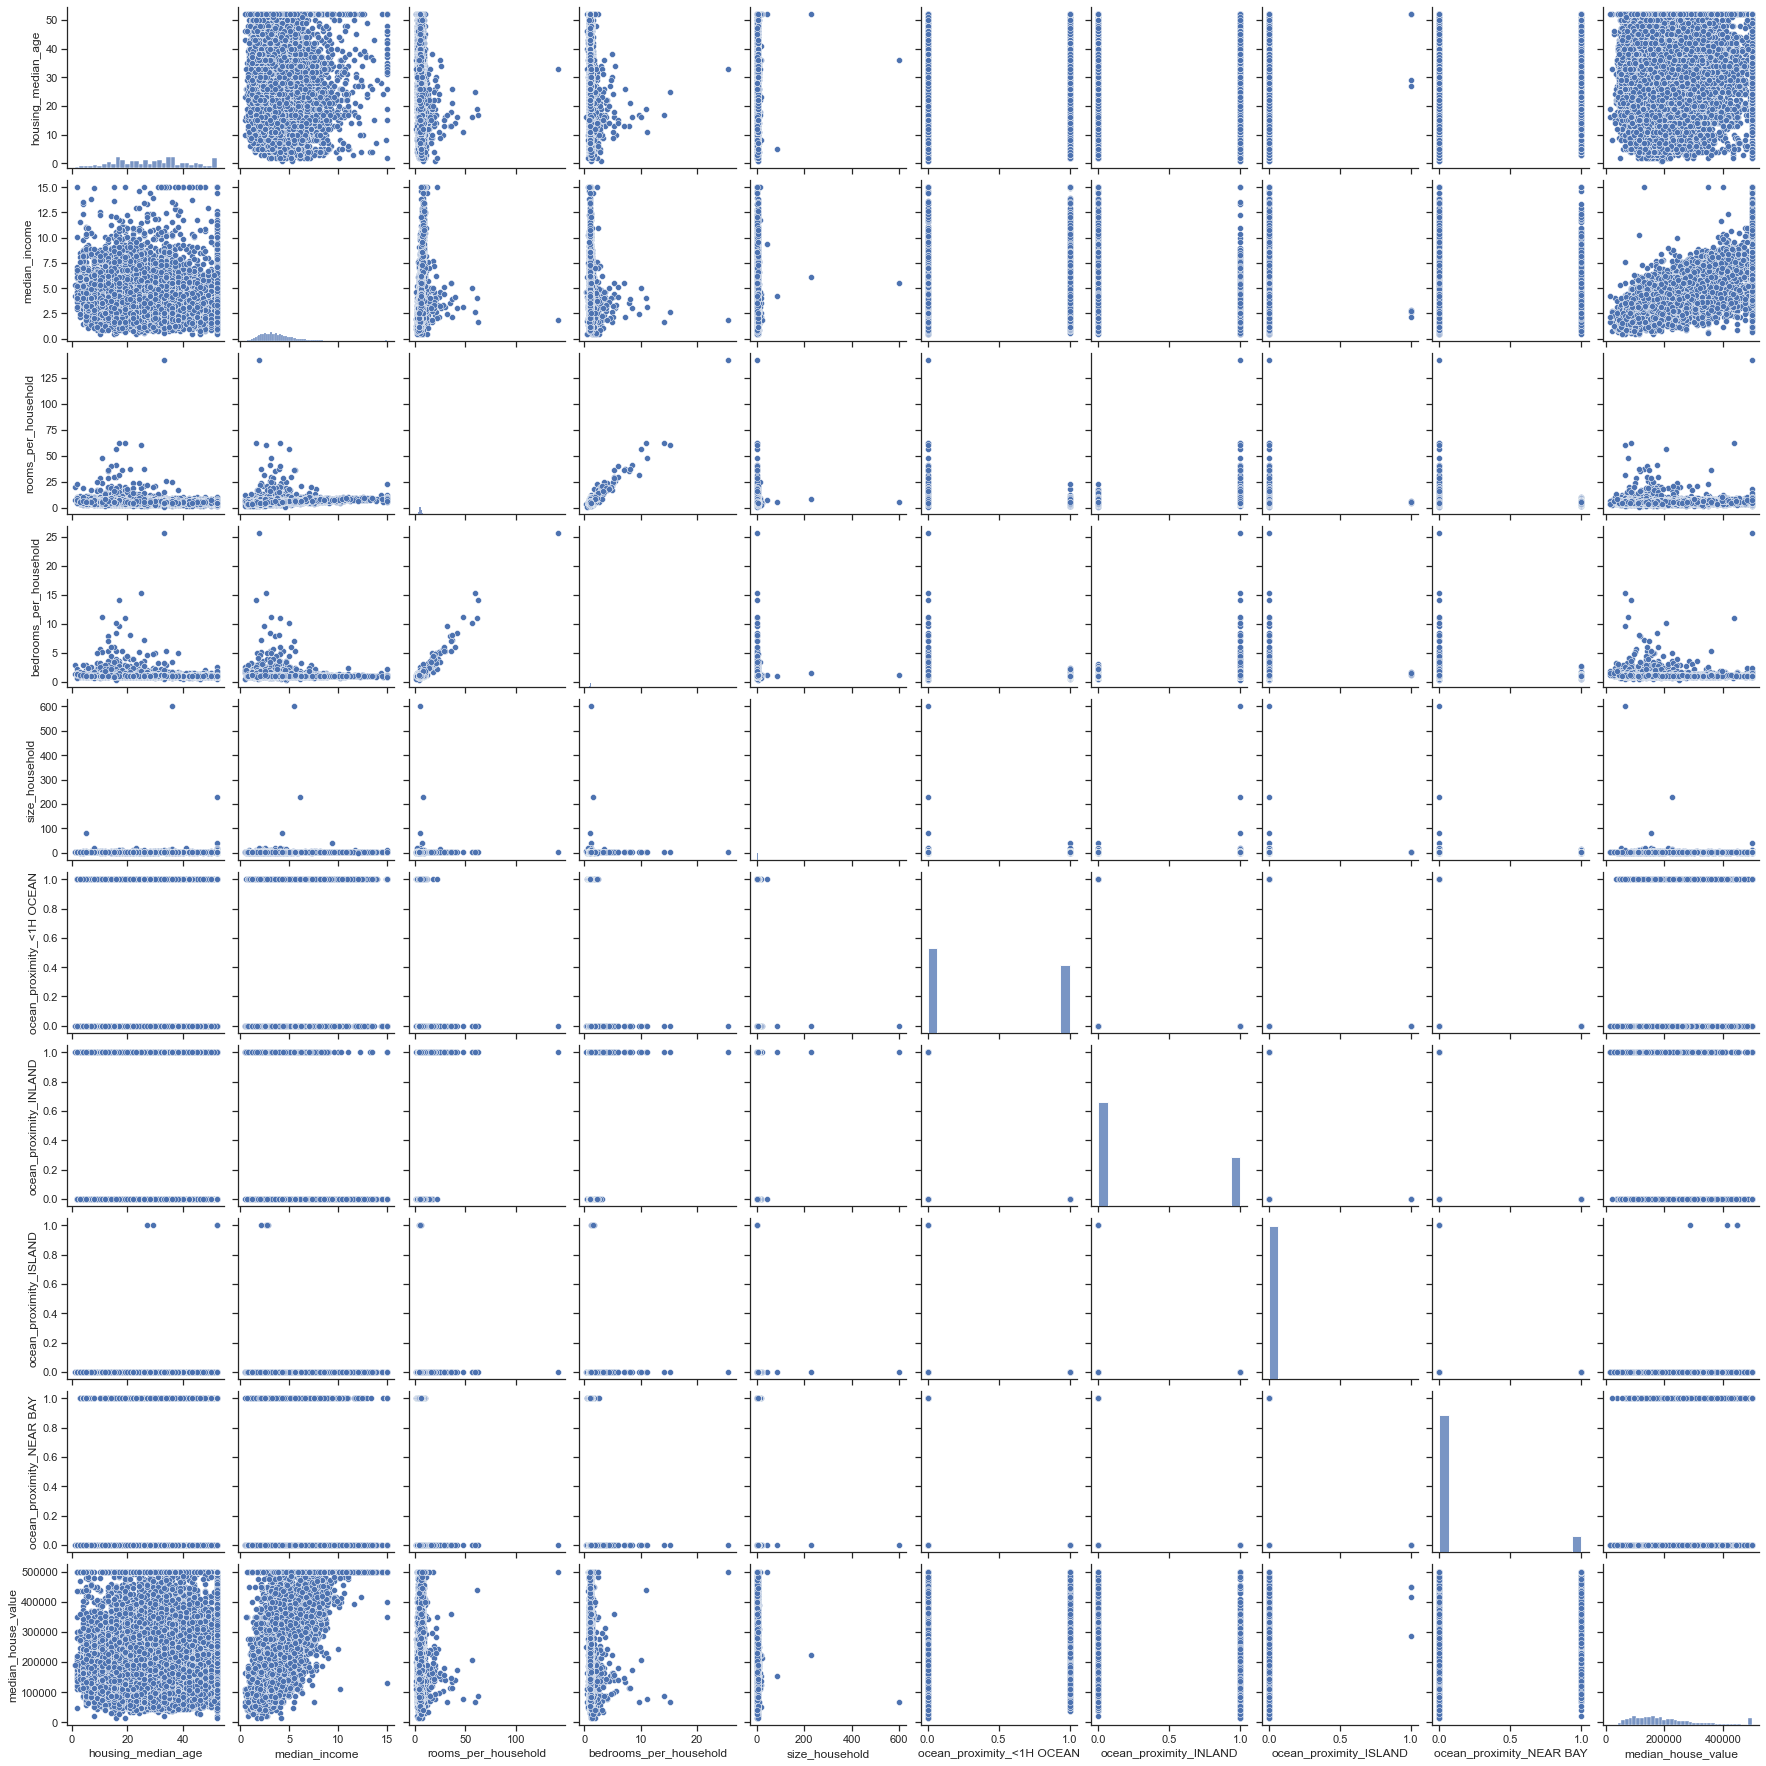

In [275]:
# plot numerical data as pairs
sns.pairplot(train_dataset)

**Findings:** positive/negative linear relationship between median_house_value and median_income
relationship between median_house_value and ocean_proximity_ISLAND

In [276]:
# Create correlation matrix for numerical variables
corr_matrix = train_dataset.corr()
corr_matrix

,housing_median_age,median_income,rooms_per_household,bedrooms_per_household,size_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,median_house_value
housing_median_age,1.000000,-0.119843,-0.150029,-0.079951,0.011038,0.049952,-0.240197,0.016887,0.253513,0.106882
median_income,-0.119843,1.000000,0.328729,-0.067715,0.006066,0.170079,-0.241848,-0.012701,0.057163,0.690371
rooms_per_household,-0.150029,0.328729,1.000000,0.848694,-0.002729,-0.097707,0.146519,-0.001565,-0.029110,0.164628
bedrooms_per_household,-0.079951,-0.067715,0.848694,1.000000,-0.004227,-0.090216,0.131967,0.015256,-0.034434,-0.039601
size_household,0.011038,0.006066,-0.002729,-0.004227,1.000000,0.005995,0.019959,-0.002064,-0.021494,-0.041592
ocean_proximity_<1H OCEAN,0.049952,0.170079,-0.097707,-0.090216,0.005995,1.000000,-0.611851,-0.016731,-0.312201,0.259666
ocean_proximity_INLAND,-0.240197,-0.241848,0.146519,0.131967,0.019959,-0.611851,1.000000,-0.012789,-0.238634,-0.490609
ocean_proximity_ISLAND,0.016887,-0.012701,-0.001565,0.015256,-0.002064,-0.016731,-0.012789,1.000000,-0.006526,0.031348
ocean_proximity_NEAR BAY,0.253513,0.057163,-0.029110,-0.034434,-0.021494,-0.312201,-0.238634,-0.006526,1.000000,0.160730
median_house_value,0.106882,0.690371,0.164628,-0.039601,-0.041592,0.259666,-0.490609,0.031348,0.160730,1.000000


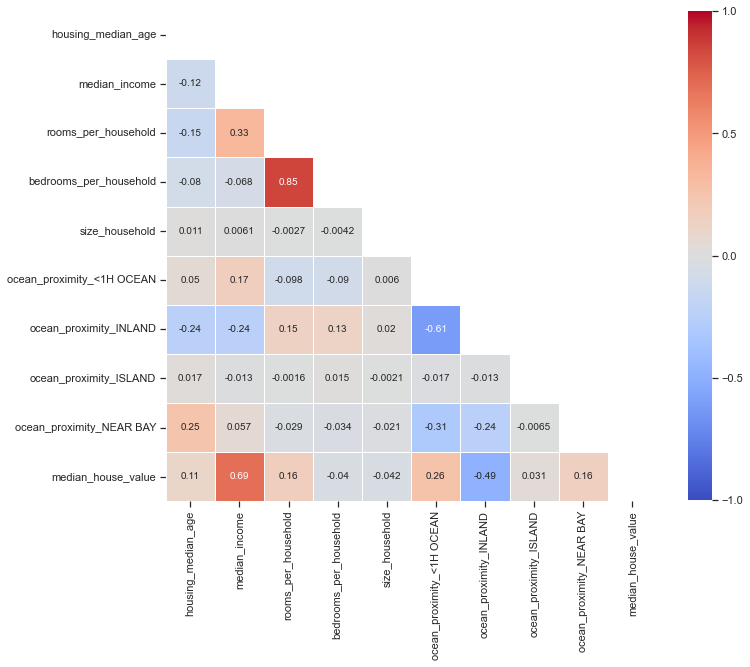

In [277]:
# Make a pretty heatmap

# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= True

# Change size
plt.subplots(figsize=(11, 15))

# Build heatmap with additional options
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

**Findings:** biggest linear correlation between median_house_value and median_income (positive)


## Descriptive statistics & EDA

### median_income

In [278]:
# Lagemaße und Streuungsmaße
train_dataset["median_income"].describe()

count    11442.000000
mean         3.873230
std          1.900038
min          0.499900
25%          2.565025
50%          3.545050
75%          4.757275
max         15.000100
Name: median_income, dtype: float64

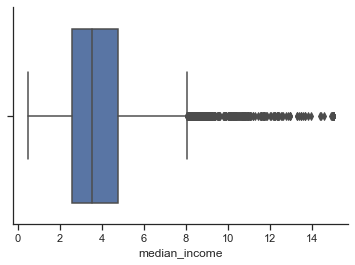

In [279]:
ax = sns.boxplot(data=train_dataset, x="median_income")

In [280]:
variance_mi = train_dataset['median_income'].var()
sd_mi = train_dataset['median_income'].std()

print("Variance:", variance_mi,"\n", 
      "Standard deviation", sd_mi)

Variance: 3.6101432756816063 
 Standard deviation 1.9000377037526404


### housing_median_age

In [281]:
# Lagemaße und Streuungsmaße
train_dataset["housing_median_age"].describe()

count    11442.000000
mean        28.668152
std         12.549474
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

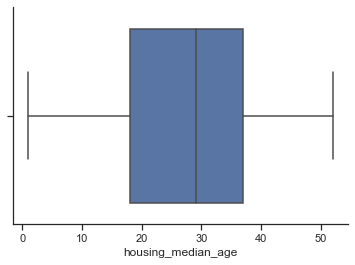

In [282]:
ax = sns.boxplot(data=train_dataset, x="housing_median_age")

In [283]:
variance_hma = train_dataset['housing_median_age'].var()
sd_hma = train_dataset['housing_median_age'].std()

print("Variance:", variance_hma,"\n", 
      "Standard deviation", sd_hma)

Variance: 157.48929068632089 
 Standard deviation 12.54947372148812


### rooms_per_household

In [284]:
# Lagemaße und Streuungsmaße
train_dataset["rooms_per_household"].describe()

count    11442.000000
mean         5.431881
std          2.479008
min          0.888889
25%          4.450514
50%          5.233767
75%          6.061969
max        141.909091
Name: rooms_per_household, dtype: float64

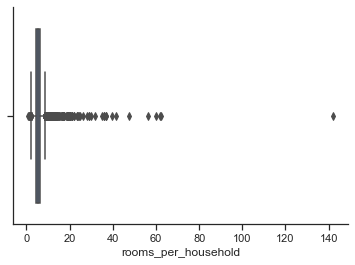

In [285]:
ax = sns.boxplot(data=train_dataset, x="rooms_per_household")

In [286]:
variance_rh = train_dataset['rooms_per_household'].var()
sd_rh = train_dataset['rooms_per_household'].std()

print("Variance:", variance_rh,"\n", 
      "Standard deviation", sd_rh)

Variance: 6.1454797029157415 
 Standard deviation 2.4790078061425587


### ocean_proximity_INLAND

In [287]:
# Lagemaße und Streuungsmaße
train_dataset["ocean_proximity_INLAND"].describe()

count    11442.000000
mean         0.318651
std          0.465974
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ocean_proximity_INLAND, dtype: float64

In [288]:
variance_opi = train_dataset['ocean_proximity_INLAND'].var()
sd_opi = train_dataset['ocean_proximity_INLAND'].std()

print("Variance:", variance_opi,"\n", 
      "Standard deviation", sd_opi)

Variance: 0.21713136657993853 
 Standard deviation 0.4659735685421852


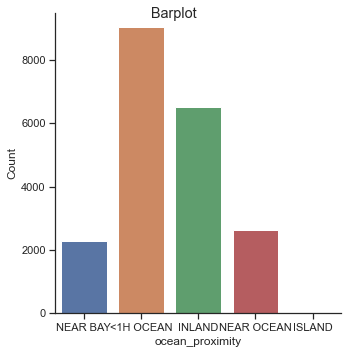

In [289]:
%matplotlib inline
import seaborn as sns
# customize seaborn plot settings
sns.set_theme(style="ticks", color_codes=True)
# Count plot of the variable.
g = sns.catplot(x="ocean_proximity",
            kind = "count",
            data=df_new_2)

# Add title
g.fig.suptitle('Barplot')
# Add custom axis labels
g.set_axis_labels("ocean_proximity", "Count");

## OLS model (statsmodel)

Least squares regression minimizes the sum of squared residuals.

In [290]:
# fit linear model with statsmodels.formula.api
lm = smf.ols(formula ='median_house_value ~ median_income', data=train_dataset).fit()

# add the regression predictions (as "pred") to our DataFrame
train_dataset['pred'] = lm.predict()

In [291]:
# summary of regression results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:45:57   Log-Likelihood:            -1.4593e+05
No. Observations:               11442   AIC:                         2.919e+05
Df Residuals:                   11440   BIC:                         2.919e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.387e+04   1776.439     24.697      0.000    4.04e+04    4.74e+04
median_income  4.203e+04    411.772    102.067      0.000    4.12e+04    4.28e+04
==============================================================================
Omnibus:                     2306.813   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5019.635
Skew:                           1.168   Prob(JB):                         0.00
Kurtosis:                       5.252   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Findings:** 
* **R squared** is the proportion of improvement due to the model (optimum: 1) --> not good
* **Adjusted R squared** takes degrees of freedom into account --> no difference in this model
* **F-Statistic** describes how much the model improved the prediction of the outcome compared to the level of inaccuracy in the model (optimum: >1) --> good
* H0 is likely to be rejected, because **t** is large and **P>t** is 0 --> effect of median_income on median_house_value is significant
* no normal distribution of errors, because **Omnibus** is large (normal: 0) and **Prob(Omnibus)** is 0 (optimum: 1)
* data is not symmetrical, because **skew** is large (symmetry: 0)
* **Kurtosis** describes the curvature of data (optimum: high) --> good

In [292]:
# multicollinearity (VIF = variance inflation factor)

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('median_house_value ~ median_income', train_dataset, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

,VIF Factor,Feature
0,5.16,Intercept
1,1.00,median_income


**Findings:** VIF is critical if above 5: true for intercept (but it is ignored in this this), but not for median_income --> no problematic amount of collinearity in our model

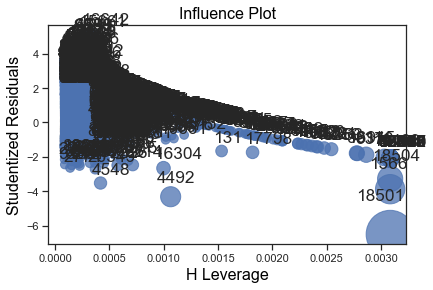

In [293]:
# identify outliers of model
import statsmodels.api as sm

fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=0.5)



In [294]:
# obtain Cook's distance 
lm_cooksd = lm.get_influence().cooks_distance[0]

# get length of df to obtain n 
n = len(train_dataset['median_income'])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(train_dataset.index[out_d], "\n", 
    lm_cooksd[out_d])

Critical Cooks distance: 0.0003495892326516343
Int64Index([ 9032, 15711,  4681,  6702,  8847, 18297,  4355, 16990,  3105,
             4248,
            ...
             4657,  4647, 12220,  3557, 15712,  5322,  8858,  8962,  8626,
             4108],
           dtype='int64', length=677) 
 [0.00058463 0.00040493 0.00055448 0.00047475 0.00673257 0.00042926
 0.00049645 0.00036051 0.00054477 0.00051017 0.00040267 0.00055896
 0.00993596 0.00055216 0.00060662 0.00044475 0.00052    0.00049538
 0.00673257 0.00054252 0.00045082 0.00060981 0.00051746 0.0024561
 0.00042088 0.00060939 0.00057207 0.00240781 0.00054044 0.00049453
 0.00038786 0.00055817 0.00057375 0.00445757 0.00047366 0.00051114
 0.00050053 0.00051277 0.00088369 0.00049453 0.00056923 0.00048931
 0.00051673 0.0004592  0.00051509 0.00053968 0.00059377 0.00069675
 0.00079087 0.00035789 0.000358   0.00053773 0.00039914 0.00039618
 0.00059542 0.00071148 0.0006026  0.00035431 0.00061064 0.00094695
 0.00046446 0.00046016 0.00056222 0.000

In [295]:
# remove outliers
oultiers = train_dataset.index[out_d]
subset = ~train_dataset.index.isin(['outliers'])

In [296]:
# model without outliers
# compute regression without influential cases
from statsmodels.formula.api import ols
lm2 = ols("median_house_value ~ median_income", data=train_dataset, subset=subset).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:46:20   Log-Likelihood:            -1.4593e+05
No. Observations:               11442   AIC:                         2.919e+05
Df Residuals:                   11440   BIC:                         2.919e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.387e+04   1776.439     24.697

**Findings:** model after removal of influential points is identical to the model before --> no improvement

<AxesSubplot:>

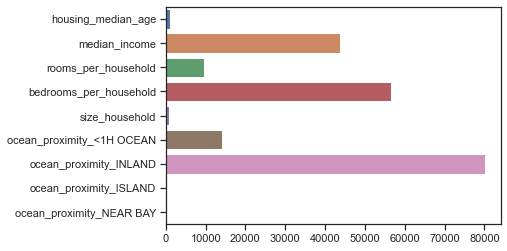

In [297]:
import seaborn as sns
import numpy as np

from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, random_state=10, max_iter=10000).fit(X_train, y_train) 

# get absolute values of coefficients
importance = np.abs(reg.coef_)
feature_names = X_train.columns

sns.barplot(x=importance, 
            y=feature_names)

In [298]:
# model with most important features without outliers
# compute regression without influential cases
from statsmodels.formula.api import ols
lm3 = ols("median_house_value ~ median_income + bedrooms_per_household + ocean_proximity_INLAND", data=train_dataset, subset=subset).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     5489.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:46:20   Log-Likelihood:            -1.4453e+05
No. Observations:               11442   AIC:                         2.891e+05
Df Residuals:                   11438   BIC:                         2.891e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.70

**Findings:** 
* **R squared** is the proportion of improvement due to the model (optimum: 1) --> better than first model
* **Adjusted R squared** takes degrees of freedom into account --> no difference in this model
* **F-Statistic** describes how much the model improved the prediction of the outcome compared to the level of inaccuracy in the model (optimum: >1) --> good
* H0 is likely to be rejected, because **t** is large and **P>t** is 0 --> effect of all variables on median_house_value is significant
* no normal distribution of errors, because **Omnibus** is large (normal: 0) and **Prob(Omnibus)** is 0 (optimum: 1)
* data is not symmetrical, because **skew** is large (symmetry: 0)
* **Kurtosis** describes the curvature of data (optimum: high) --> good

## Model with sci-kit learn

In [299]:
# Select features for simple regression
features = ['median_income']
X_sk = df_new_2[features]

# Create response
y_sk = df_new_2['median_house_value']

In [300]:
from sklearn.model_selection import train_test_split

# Train Test Split
# Use random_state to make this notebook's output identical at every run
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_sk, y_sk, test_size=0.3, random_state=10)

In [301]:
from sklearn.linear_model import LinearRegression

# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [302]:
# Fit model
lm_pipe.fit(X_train_sk, y_train_sk)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022A0BC8C700>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
      

In [303]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([79786.446417])

In [304]:
# evaluation with training data
y_pred = lm_pipe.predict(X_train_sk)

In [305]:
# R squared
from sklearn.metrics import r2_score

r2_score(y_train_sk, y_pred)

0.4761432070894357

In [306]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train_sk, y_pred)

7003791876.722233

In [307]:
# RMSE
mean_squared_error(y_train_sk, y_pred, squared=False)

83688.66038312617

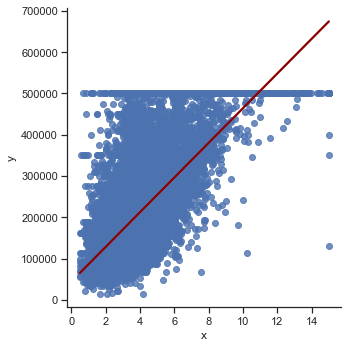

In [308]:
import seaborn as sns 
sns.set_theme(style="ticks")

# Plot with Seaborn

# We first need to create a DataFrame
train_dataset = pd.DataFrame({'x': X_train_sk['median_income'], 'y':y_train_sk})

sns.lmplot(x='x', y='y', data=train_dataset, line_kws={'color': 'darkred'}, ci=False)

## Natural spline

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

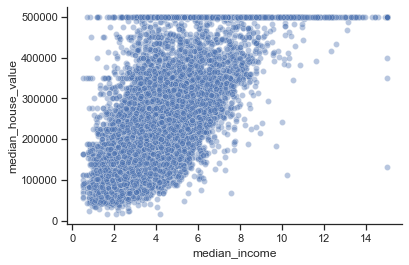

In [309]:
# visualize data
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# plot
sns.scatterplot(x=X_train['median_income'], y=y_train, alpha=0.4)

### Natural spline

In [310]:
from patsy import dmatrix
import statsmodels.api as sm

transformed_x3 = dmatrix("cr(train, df = 3)", {"train": X_train['median_income']}, return_type='dataframe')

reg = sm.GLM(y_train, transformed_x3).fit()

In [311]:
# Training data
pred_train = reg.predict(dmatrix("cr(train, df=3)", {"train": X_train['median_income']}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = reg.predict(dmatrix("cr(test, df=3)", {"test": X_test['median_income']}, return_type='dataframe'))
rmse_test = mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_ns = pd.DataFrame(
    {
    "model": "Natural spline (ns)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })

model_results_ns

,model,rmse_train,rmse_test
0,Natural spline (ns),83447.933485,83560.293693


In [312]:
import numpy as np
import matplotlib.pyplot as plt

# Create observations
xp = np.linspace(X_test.min(),X_test.max(), 100)

## Lasso regression

### Standardization

Lasso performs best when all numerical features are centered around 0 and have variance in the same order. 
This means it is important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation.

In [313]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

### Lasso regression

In [314]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [315]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))

R squared training set 61.19


In [316]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

MSE training set 5188724334.66


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

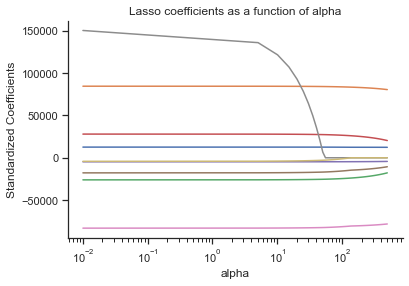

In [317]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

In [318]:
# Bei der Lasso Regression soll der optimale Hyperparameter Lambda mit k-fold-crossvalidation ermittelt werden.
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [319]:
model.alpha_ 

744.0910696441316

In [320]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=744.0910696441316)

In [321]:
print(list(zip(lasso_best.coef_, X)))

[(12300.845029971839, 'Intercept'), (78415.55160262629, 'median_income')]


(5000000000.0, 5600000000.0)

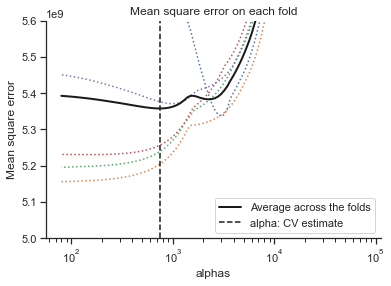

In [322]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 5000000000, 5600000000
plt.ylim(ymin, ymax)

**Findings:**  best fitted model is Lasso regression model because of r squared is the highest

## Regression diagnostics mit statsmodel

### CCPR Plot

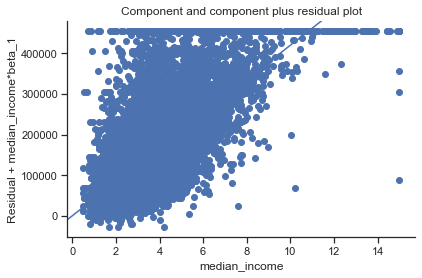

In [323]:
fig = sm.graphics.plot_ccpr(lm, "median_income")
fig.tight_layout(pad=1.0)

**Findings:** positive association of median_income with median_house_value

## Evaluation with training data

In [324]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))

R squared training set 60.88


## Evaluation with test data

In [325]:
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared test set 58.38


In [326]:
mean_squared_error(y_test, lasso_best.predict(X_test))

5502102158.024812